## Import Modules 

In [2]:
#basic modules for python and mapping
import os
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

import geopandas as gpd 
import shapely
from fiona.crs import from_epsg

import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas import scatter_matrix

import seaborn as sns
from scipy import stats

import json
import requests
import zipfile
import io 
import ast
import urllib

#sklearn modules - machine learning tools 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.api import abline_plot
from sklearn.ensemble  import RandomForestRegressor as rfc
from sklearn.cross_validation import train_test_split
#try:
#    import urllib2 as urllib
#except ImportError:
#    import urllib.request as urllib

#try:
#    import urllib2 as ulib
#except ImportError:
#    import urllib3 as ulib

#try:
#    from StringIO import BytesIO as io
#except ImportError:
#    from io import BytesIO as io

#try:
#    from urllib import urlencode as urlencode
#except ImportError:
#    from urllib.parse import urlencode as urlencode
    
#try:
#    from urllib import urlopen as urlopen
#except ImportError:
#    from urllib.request import urlopen as urlopen
    
#try:
#    from urllib2 import HTTPError as HTTPError
#except ImportError:
#    from urllib.error import HTTPError as HTTPError


%pylab inline
%matplotlib inline



Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# STEP 1 - Import SAT 2012 Data

In [3]:
!curl https://data.cityofnewyork.us/api/views/f9bf-2cp4/rows.csv?accessType=DOWNLOAD > sat2012nyc.csv 
    #bringin in the SAT data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28339    0 28339    0     0  99065      0 --:--:-- --:--:-- --:--:-- 99435


In [4]:
print("PUIdata", os.getenv("PUIDATA")) #getting env variable

PUIdata /nfshome/mbh329/PUIdata


In [5]:
!mv sat2012nyc.csv $PUIDATA #mv to puidata

In [6]:
sat2012nyc = pd.read_csv('%s/sat2012nyc.csv'%os.getenv("PUIDATA")) #sat2012nyc is basic csv, not wrangled 

In [7]:
sat2012nyc   #s values will have to be taken care of 

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522,574,525
7,01M650,CASCADES HIGH SCHOOL,18,417,418,411
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624,604,628
9,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395,400,387


In [8]:
sat2012nyc.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score'],
      dtype='object')

In [9]:
sat2012nyc.drop(['SCHOOL NAME', 'Num of SAT Test Takers'], axis=1, inplace=True)

#keeping 'DBN', 'Num of SAT Test Takers',
#       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
#      'SAT Writing Avg. Score'

In [10]:
sat2012nyc.head()

,DBN,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,355,404,363
1,01M448,383,423,366
2,01M450,377,402,370
3,01M458,414,401,359
4,01M509,390,433,384


In [11]:
sat2012nyc.dtypes

DBN                                object
SAT Critical Reading Avg. Score    object
SAT Math Avg. Score                object
SAT Writing Avg. Score             object
dtype: object

### converting avg columns to float and making new columns 

In [12]:
sat2012nyc['readavg'] = pd.to_numeric(sat2012nyc['SAT Critical Reading Avg. Score'], errors='coerce')

In [13]:
sat2012nyc['mathavg'] = pd.to_numeric(sat2012nyc['SAT Math Avg. Score'], errors='coerce')

In [14]:
sat2012nyc['writingavg'] = pd.to_numeric(sat2012nyc['SAT Writing Avg. Score'], errors='coerce')

In [15]:
sat2012nyc

,DBN,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,readavg,mathavg,writingavg
0,01M292,355,404,363,355.0,404.0,363.0
1,01M448,383,423,366,383.0,423.0,366.0
2,01M450,377,402,370,377.0,402.0,370.0
3,01M458,414,401,359,414.0,401.0,359.0
4,01M509,390,433,384,390.0,433.0,384.0
5,01M515,332,557,316,332.0,557.0,316.0
6,01M539,522,574,525,522.0,574.0,525.0
7,01M650,417,418,411,417.0,418.0,411.0
8,01M696,624,604,628,624.0,604.0,628.0
9,02M047,395,400,387,395.0,400.0,387.0


In [16]:
sat2012nyc.dtypes

DBN                                 object
SAT Critical Reading Avg. Score     object
SAT Math Avg. Score                 object
SAT Writing Avg. Score              object
readavg                            float64
mathavg                            float64
writingavg                         float64
dtype: object

In [17]:
sat2012nyc.columns

Index(['DBN', 'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'readavg', 'mathavg', 'writingavg'],
      dtype='object')

In [18]:
sat2012nyc.drop(['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score'], axis=1, inplace=True)

#drop sat scores that aren't numeric 


In [19]:
sat2012nyc.shape

(478, 4)

### getting mean for nyc sat 

In [20]:
#sat2012nyc['sat_avg'] = sat2012nyc["SAT Critical Reading Avg. Score"] + sat2012nyc["SAT Math Avg. Score"] + sat2012nyc["SAT Writing Avg. Score"] / 3


sat2012nyc['sat_avg'] = sat2012nyc[["readavg", "mathavg", "writingavg"]].mean(axis=1)

#find the average of the scores                   

In [21]:
sat2012nyc.head()

,DBN,readavg,mathavg,writingavg,sat_avg
0,01M292,355.0,404.0,363.0,374.000000
1,01M448,383.0,423.0,366.0,390.666667
2,01M450,377.0,402.0,370.0,383.000000
3,01M458,414.0,401.0,359.0,391.333333
4,01M509,390.0,433.0,384.0,402.333333


In [22]:
sat2012nyc.columns

Index(['DBN', 'readavg', 'mathavg', 'writingavg', 'sat_avg'], dtype='object')

In [23]:
sat2012clean = sat2012nyc.drop(['readavg', 'writingavg'], axis=1)
                
#drop data to have mathavg and overall sat avg 

In [24]:
sat2012clean.shape

(478, 3)

# Discussion Step 1.1: In this step I created wrangled NYC 2012 SAT data for future analysis. I had 478 observations and 3 key features that I want to carry for my analysis. 

In [25]:
#sat2012clean.dropna()

# Downloading School crime report data

In [26]:
!curl https://data.cityofnewyork.us/api/views/qybk-bjjc/rows.csv?accessType=DOWNLOAD > crimereport.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2471k    0 2471k    0     0  4660k      0 --:--:-- --:--:-- --:--:-- 4653k


In [27]:
!mv crimereport.csv $PUIDATA

In [28]:
school_crime = pd.read_csv('%s/crimereport.csv'%os.getenv("PUIDATA"))

### school_crime is original df 

In [29]:
school_crime.head() 

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2015-16,K006,17K006,P.S. 006,K006,43 SNYDER AVENUE,K,17.0,712,NaN,...,BROOKLYN,11226.0,40.648590,-73.957138,14.0,40.0,794.0,3117230.0,3.051030e+09,Erasmus ...
1,2015-16,K005,16K005,P.S. 005 Dr. Ronald Mcnair,K005,820 HANCOCK STREET,K,16.0,231,NaN,...,BROOKLYN,11233.0,40.685695,-73.922463,3.0,41.0,377.0,3039906.0,3.014900e+09,Stuyvesant Heights ...
2,2015-16,K003,13K003,P.S. 003 The Bedford Village,K003,50 JEFFERSON AVENUE,K,13.0,450,NaN,...,BROOKLYN,11216.0,40.682663,-73.955338,3.0,36.0,227.0,3057406.0,3.019980e+09,Clinton Hill ...
3,2015-16,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,1378,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
4,2015-16,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,374,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...


In [30]:
school_crime.columns

Index(['School Year', 'Building Code', 'DBN', 'Location Name', 'Location Code',
       'Address', 'Borough', 'Geographical District Code', 'Register',
       'Building Name', '# Schools', 'Schools in Building', 'Major N', 'Oth N',
       'NoCrim N', 'Prop N', 'Vio N', 'ENGroupA', 'RangeA', 'AvgOfMajor N',
       'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N',
       'Borough Name', 'Postcode', 'Latitude', 'Longitude', 'Community Board',
       'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'],
      dtype='object')

### dropping columns to show just violence, dbn and latlong

In [31]:
schoolvio = school_crime.drop(['Building Code', 'Location Name',
       'Address', 'Borough', 'Geographical District Code', 'Register',
       'Building Name', 'Borough Name', 'Postcode', 'Community Board',
       'Council District ', 'Census Tract', 'BIN', 'BBL', 'NTA'], axis=1)
                  
                  
                  
#'DBN', '# Schools', 'Schools in Building', 'Major N', 'Oth N',
#       'NoCrim N', 'Prop N', 'Vio N', 'ENGroupA', 'RangeA', 'AvgOfMajor N',
#      'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N', 'Latitude', 'Longitude','Location Code' 'School Year'

In [32]:
schoolvio.head()

,School Year,DBN,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,AvgOfMajor N,AvgOfOth N,AvgOfNoCrim N,AvgOfProp N,AvgOfVio N,Latitude,Longitude
0,2015-16,17K006,K006,1,P.S. 006,0.0,1.0,2.0,1.0,0.0,4C,501-750,0.28,1.11,1.74,0.75,0.53,40.648590,-73.957138
1,2015-16,16K005,K005,1,P.S. 005 Dr. Ronald Mcnair,0.0,0.0,2.0,0.0,0.0,2C,1-250,0.24,0.71,1.71,0.51,0.32,40.685695,-73.922463
2,2015-16,13K003,K003,1,P.S. 003 The Bedford Village,0.0,0.0,2.0,0.0,0.0,3C,251-500,0.27,0.90,1.67,0.63,0.44,40.682663,-73.955338
3,2015-16,NaN,NaN,3,Parkside Preparatory Academy | P.S. K141 |Exp...,0.0,3.0,1.0,0.0,1.0,5C,751-1000,0.38,1.71,2.38,0.98,0.82,40.656183,-73.951583
4,2015-16,75K141,K141,3,Parkside Preparatory Academy | P.S. K141 |Exp...,NaN,NaN,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN,40.656183,-73.951583


In [33]:
schoolvio.columns ### schoolvio is 1st drop 
                  


Index(['School Year', 'DBN', 'Location Code', '# Schools',
       'Schools in Building', 'Major N', 'Oth N', 'NoCrim N', 'Prop N',
       'Vio N', 'ENGroupA', 'RangeA', 'AvgOfMajor N', 'AvgOfOth N',
       'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N', 'Latitude', 'Longitude'],
      dtype='object')

In [34]:
schoolcrime13_14 = schoolvio[schoolvio["School Year"]== "2013-14"]

In [71]:
schoolcrime13_14.shape

(2159, 19)

In [72]:
#schoolcrimeplot = schoolvio.drop(['School Year', 'Location Code', '# Schools',
#       'Schools in Building', 'Major N', 'Oth N', 'NoCrim N', 'Prop N',
#       'Vio N', 'ENGroupA', 'RangeA', 'AvgOfOth N',
#       'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N', 'Latitude', 'Longitude'], axis=1)
                                 
#'School Year', dbn, 'AvgOfMajor N'

In [73]:
#schoolcrimeplot.rename(columns={"AvgOfMajor N": "avg_major_crime"})#2013-2014

In [74]:
schoolcrime13_14.rename(columns={"AvgOfMajor N": "avg_major_crime", "AvgOfOth N": "avg_other_crime", 
                                 "AvgOfNoCrim N": "avg_no_crime", "AvgOfProp N": "avg_prop_crime",
                                 "AvgOfVio N": "avg_vio_crime"}, inplace=True)
#rename columns so they are easier to deal with                                  

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [75]:
schoolcrime13_14.sort_values(by="avg_major_crime", ascending=True) 

,School Year,DBN,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude
4882,2013-14,30Q286,Q286,1,"Young Women's Leadership School, Astoria",0.0,0.0,0.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.771215,-73.924591
5896,2013-14,14K380,K380,1,P.S. 380 John Wayne Elementary,0.0,0.0,0.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.702427,-73.952985
5901,2013-14,75K369,K369,1,P.S. K369 - Coy L. Cox School,0.0,0.0,1.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.687257,-73.983579
5914,2013-14,32K377,K377,1,P.S. 377 Alejandrina B. De Gautier,0.0,2.0,1.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.694018,-73.915263
5917,2013-14,20K030,K030,1,PS/IS 30 Mary White Ovington,0.0,0.0,0.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.633590,-74.023948
5922,2013-14,23K327,K327,1,P.S. 327 Dr. Rose B. English,1.0,0.0,3.0,0.0,1.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.668475,-73.912351
4914,2013-14,25Q499,Q499,1,"The Queens College School for Math, Science an...",0.0,0.0,0.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.739246,-73.822057
5933,2013-14,NaN,NaN,2,P.S. 316 Elijah Stroud | Elijah Stroud Middle...,0.0,1.0,3.0,0.0,1.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.674406,-73.960254
5948,2013-14,32K376,K376,1,P.S. 376,0.0,0.0,0.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.698021,-73.920711
4901,2013-14,28Q896,Q896,1,"Young Women's Leadership School, Queens",0.0,0.0,1.0,0.0,0.0,4C,501-750,0.33,1.32,1.76,0.83,0.59,40.707527,-73.806412


In [76]:
schoolcrime13_14.head()

,School Year,DBN,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,ENGroupA,RangeA,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude
4151,2013-14,14K050,K050,2,J.H.S. 050 John D. Wells l Success Academy Cha...,NaN,NaN,NaN,NaN,NaN,3C,251-500,NaN,NaN,NaN,NaN,NaN,40.711704,-73.960275
4152,2013-14,84K182,K182,2,J.H.S. 050 John D. Wells l Success Academy Cha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.711704,-73.960275
4153,2013-14,19K108,K108,1,P.S. 108 Sal Abbracciamento,0.0,0.0,3.0,0.0,0.0,5C,751-1000,0.52,1.71,2.49,1.16,0.75,40.681268,-73.884063
4154,2013-14,NaN,NaN,3,"Brooklyn Latin School, The | Green School: An...",1.0,8.0,4.0,4.0,4.0,7C,1251-1500,0.86,3.26,5.55,2.17,1.29,40.709941,-73.943641
4155,2013-14,14K449,K449,3,"Brooklyn Latin School, The | Green School: An...",NaN,NaN,NaN,NaN,NaN,4C,501-750,NaN,NaN,NaN,NaN,NaN,40.709941,-73.943641


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


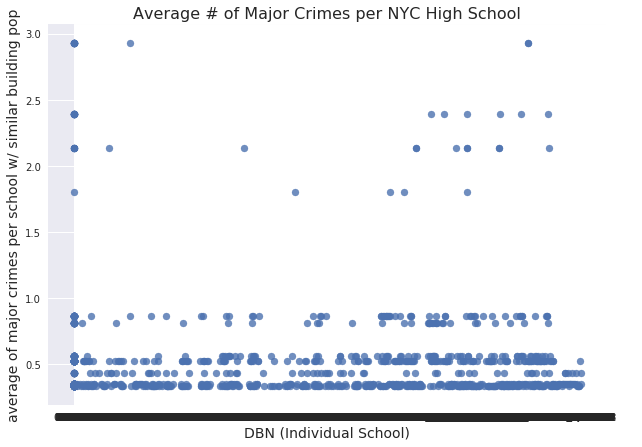

In [77]:
ax = plt.figure(figsize=(10,7)).add_subplot(111)

ax.set_ylabel('average of major crimes per school w/ similar building pop', fontsize=14)
ax.set_xlabel('DBN (Individual School)', fontsize=14)
ax.set_title("Average # of Major Crimes per NYC High School", fontsize=16)

ax.scatter(schoolcrime13_14.DBN, schoolcrime13_14.avg_major_crime, alpha=0.8, )

plt.show()



### Figure 1: In this scatter plot, I have plotted the Individual school (x axis) against the average # of major crimes per school building (i am assuming taking into account all schools within the building). You will notice that most schools in the dataset have similar avg of major crimes generally less than 1. However there are some schools that have values over 1.5 including PROGRESS High School for Professional Careers, George Washington Yabc, Collegiate Institute for Math and Science, Bronx High School for Writing and Communication, Kingsbridge International High School which have some of the highest rates of major crimes in the NYC high schools. From my research these schools are largely located in the Bronx.

# Step 2 - merge

## 2.1

In [78]:
merge_df_nyc = sat2012clean.merge(schoolcrime13_14)

In [79]:
merge_df_nyc.tail()

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


,DBN,mathavg,sat_avg,School Year,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,...,Vio N,ENGroupA,RangeA,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude
459,75R025,NaN,NaN,2013-14,R025,2,South Richmond High School I.S./P.S. 25| ALC ...,NaN,NaN,NaN,...,NaN,4C,501-750,NaN,NaN,NaN,NaN,NaN,40.508809,-74.222403
460,75X012,NaN,NaN,2013-14,X012,1,P.S. X012 Lewis and Clark School,3.0,7.0,10.0,...,6.0,2C,1-250,0.43,1.03,1.23,0.99,0.41,40.840145,-73.844419
461,75X754,NaN,NaN,2013-14,X754,2,Foreign Language Academy of Global Studies | ...,NaN,NaN,NaN,...,NaN,4C,501-750,NaN,NaN,NaN,NaN,NaN,40.811162,-73.909804
462,79Q950,400.0,440.666667,2013-14,Q950,2,Pathways to Graduation | ALC - Sutphin HS ALC ...,NaN,NaN,NaN,...,NaN,12C,3001-4000,NaN,NaN,NaN,NaN,NaN,40.702840,-73.808352
463,79X490,370.0,365.666667,2013-14,X490,1,Phoenix Academy,0.0,0.0,0.0,...,0.0,2C,1-250,0.43,1.03,1.23,0.99,0.41,NaN,NaN


In [80]:
merge_df_nyc.shape

(464, 21)

In [81]:
merge_df_nyc.drop([ 'ENGroupA', 'RangeA'], axis=1, inplace=True)
 
#, 'AvgOfMajor N', 'AvgOfOth N',
#       'AvgOfNoCrim N', 'AvgOfProp N', 'AvgOfVio N', 'Latitude', 'Longitude'
#'DBN', 'mathavg', 'sat_avg', 'School Year', 'Location Code',
#       '# Schools', 'Schools in Building', 'Major N', 'Oth N', 'NoCrim N',

In [82]:
merge_df_nyc.tail()

,DBN,mathavg,sat_avg,School Year,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude
459,75R025,NaN,NaN,2013-14,R025,2,South Richmond High School I.S./P.S. 25| ALC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.508809,-74.222403
460,75X012,NaN,NaN,2013-14,X012,1,P.S. X012 Lewis and Clark School,3.0,7.0,10.0,4.0,6.0,0.43,1.03,1.23,0.99,0.41,40.840145,-73.844419
461,75X754,NaN,NaN,2013-14,X754,2,Foreign Language Academy of Global Studies | ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.811162,-73.909804
462,79Q950,400.0,440.666667,2013-14,Q950,2,Pathways to Graduation | ALC - Sutphin HS ALC ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.702840,-73.808352
463,79X490,370.0,365.666667,2013-14,X490,1,Phoenix Academy,0.0,0.0,0.0,0.0,0.0,0.43,1.03,1.23,0.99,0.41,NaN,NaN


In [83]:
merge_df_nyc.fillna({'Major N':0,'Oth N':0, 'NoCrim N':0, 'Prop N':0 , 'Vio N':0, 'AvgOfMajor N':0, 'AvgOfOth N':0, 'AvgOfNoCrim N':0, 'AvgOfProp N':0,'AvgOfVio N':0}, inplace=True) 
#making nans 0 vgOfMajor N':0, 'AvgOfOth N':0, 'AvgOfNoCrim N':0, 'AvgOfProp N':0
#'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'AvgOfMajor N', 'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N','AvgOfVio N'
# 'AvgOfMajor N', 'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N','AvgOfVio N']] = merge_df_nyc[['Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'AvgOfMajor N', 'AvgOfOth N', 'AvgOfNoCrim N', 'AvgOfProp N','AvgOfVio N'

,DBN,mathavg,sat_avg,School Year,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude
0,01M292,404.0,374.000000,2013-14,M292,4,Henry Street School for International Studies ...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.713684,-73.986336
1,01M448,423.0,390.666667,2013-14,M448,1,University Neighborhood High School,1.0,0.0,2.0,1.0,0.0,0.35,1.06,1.09,0.73,0.50,40.712399,-73.984497
2,01M450,402.0,383.000000,2013-14,M450,1,East Side Community School,1.0,4.0,0.0,3.0,1.0,0.33,1.32,1.76,0.83,0.59,40.729589,-73.982555
3,01M458,401.0,391.333333,2013-14,M458,2,Forsyth Satellite Academy | Cascades High Sch...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.722520,-73.990728
4,01M509,433.0,402.333333,2013-14,M509,3,Marta Valle High School | Lower East Side Pre...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.720581,-73.985645
5,01M515,557.0,401.666667,2013-14,M515,3,Marta Valle High School | Lower East Side Pre...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.720581,-73.985645
6,01M539,574.0,540.333333,2013-14,M539,1,"New Explorations into Science, Technology and ...",0.0,3.0,4.0,2.0,1.0,0.81,3.95,6.51,2.30,1.78,40.718895,-73.979308
7,01M650,418.0,415.333333,2013-14,M650,2,Forsyth Satellite Academy | Cascades High Sch...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.722520,-73.990728
8,01M696,604.0,618.666667,2013-14,M696,1,Bard High School Early College,0.0,0.0,0.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59,40.719029,-73.975891
9,02M047,400.0,394.000000,2013-14,M047,2,47 The American Sign Language and English Seco...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.738548,-73.982455


### ^the above code is filling nan for specific columns, if i did all of them my latlon gets messed up and i can't plot

In [84]:
merge_df_nyc.head()

,DBN,mathavg,sat_avg,School Year,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude
0,01M292,404.0,374.000000,2013-14,M292,4,Henry Street School for International Studies ...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.713684,-73.986336
1,01M448,423.0,390.666667,2013-14,M448,1,University Neighborhood High School,1.0,0.0,2.0,1.0,0.0,0.35,1.06,1.09,0.73,0.50,40.712399,-73.984497
2,01M450,402.0,383.000000,2013-14,M450,1,East Side Community School,1.0,4.0,0.0,3.0,1.0,0.33,1.32,1.76,0.83,0.59,40.729589,-73.982555
3,01M458,401.0,391.333333,2013-14,M458,2,Forsyth Satellite Academy | Cascades High Sch...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.722520,-73.990728
4,01M509,433.0,402.333333,2013-14,M509,3,Marta Valle High School | Lower East Side Pre...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.720581,-73.985645


In [85]:
merge_countdf =  merge_df_nyc.groupby(['DBN', '# Schools']).count()


#schools in building account for all types of schools prek-12 so SAT scores would only concern the high school 

In [86]:
merge_countdf.head()   #count of all the schools by DBN

,,mathavg,sat_avg,School Year,Location Code,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude
DBN,# Schools,,,,,,,,,,,,,,,,,
01M292,4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1
01M448,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
01M450,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
01M458,2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1
01M509,3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1


# Discussion of Data - Step 2

### For this step i choose to merge my dataframe with only 2013-2014 crime stats which dropped any other yearly record. My reasoning was because i wanted to highlight violence in schools with the closest annual data that was provided. 

### originally there were over 6000 rows of data which covered all schools in the crime report but for this analysis it was only neccessary to focus on the schools that were also in the SAT data (i.e. High Schools) so i merged the two df's together and had 464 records which is similar to my original SAT data but some data was lost that may be a result of duplicacy in the data. 

### I also seem to have much fewer observations than F biancos NB. Unsure as to why there is a difference. I lost 7 observations when i merged my two datasets.

### I converted NAN values into 0 but realise that i will have to do something with the 0 SAT scores later on in my analysis but for now i chose to leave them in. Regarding the # of schools per building, I assume that some buildings have multiple schools but that these schools could be elementary, middle, and high schools. The way the data is aggregated shows how important further analysis is for each observation and is something that should be refined/discussed in further datasets. Also if there are multiple high schools in one building do they average the SAT schools of all the schools or take just one (will skew SAT scores or could be a deliberate choice to highlight the "better" performing high school by Dept of Ed.)



# STEP 3 - Visualize the school related data 

### 3.1 plot the Math SAT score and the average of all SAT scores (the feature you created in Task 1) as a function of two crime statistics (5 points)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


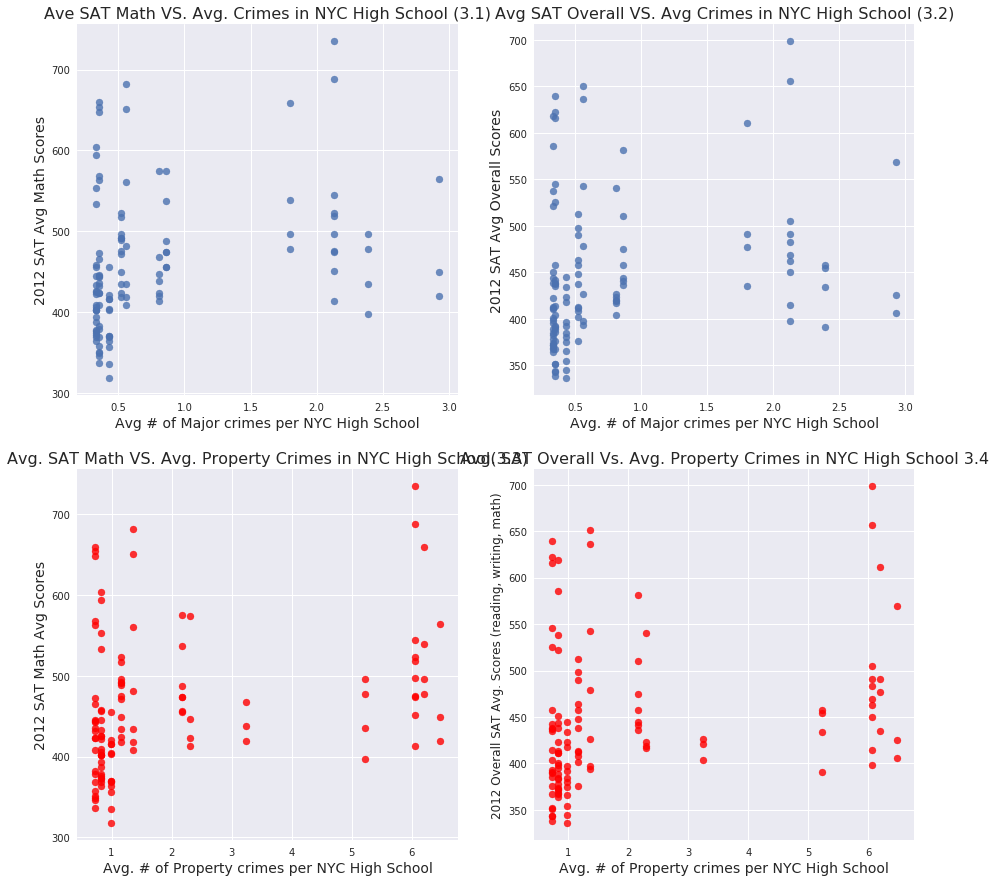

In [87]:
#crime= x, sat =y 

fig = plt.figure(figsize=(15,15))

ax90 = fig.add_subplot(221)

ax90.set_ylabel('2012 SAT Avg Math Scores', fontsize=14)
ax90.set_xlabel('Avg # of Major crimes per NYC High School', fontsize=14)
ax90.set_title("Ave SAT Math VS. Avg. Crimes in NYC High School (3.1)", fontsize=16)

ax90.scatter(merge_df_nyc.avg_major_crime, merge_df_nyc.mathavg, alpha=0.8, )


########################################################################################

ax91 = fig.add_subplot(222)
ax91.set_ylabel('2012 SAT Avg Overall Scores', fontsize=14)
ax91.set_xlabel('Avg. # of Major crimes per NYC High School', fontsize=14)
ax91.set_title("Avg SAT Overall VS. Avg Crimes in NYC High School (3.2)", fontsize=16)

ax91.scatter(merge_df_nyc.avg_major_crime, merge_df_nyc.sat_avg, alpha=0.8, )




###############################################################################################

ax92 = fig.add_subplot(223)
ax92.set_ylabel('2012 SAT Math Avg Scores', fontsize=14)
ax92.set_xlabel('Avg. # of Property crimes per NYC High School', fontsize=14)
ax92.set_title("Avg. SAT Math VS. Avg. Property Crimes in NYC High School(3.3)", fontsize=16)

ax92.scatter(merge_df_nyc.avg_prop_crime, merge_df_nyc.mathavg, alpha=0.8, c="r")


##############################################################################################

ax93 = fig.add_subplot(224)
ax93.set_ylabel('2012 Overall SAT Avg. Scores (reading, writing, math)', fontsize=12)
ax93.set_xlabel('Avg. # of Property crimes per NYC High School', fontsize=14)
ax93.set_title("Avg. SAT Overall Vs. Avg. Property Crimes in NYC High School 3.4", fontsize=16)

ax93.scatter(merge_df_nyc.avg_prop_crime, merge_df_nyc.sat_avg, alpha=0.8, c="r")

plt.show()

### figure 3.1: in this figure, we have the average # of major crimes (y) as a function the average Math SAT score (x) for NYC public high schools. 300 is the lowest possible score you can recieve on the individual SAT so that represents our 0 value. The distribution is interesting because it seems that there isn't a clear trend in average # of crimes and the AVG sat score as you see certain schools with a high level of crime but also a high AVG Math SAT score; however, there are some schools where you clearly see a high average of major crime and relatively low SAT scores which would be an assumption one might make. I would like to point out that the school with the highest avg SAT score also has a high rate of major crime (Stuyvestant High School). 

### Figure 3.2: In this figure, I have plotted the average # of Major Crimes per NYC High school as a function of the 2012 Overall SAT average score of NYC high schools. Compared to figure 2, these results are pretty similar and follow a similar distribution and we can say that the average Math score is a good overall indication of how NYC high school students do on the exam as a whole. However, we can still not draw any conclusive results on the rate of crime in schools being correlated with the average SAT scores. 

### Figure 3.3 : In this figure, we have plotted the average # of property crimes per NYC high school(y) as a fucntion of the  2012 average SAT math scores (x). One thing to take notice of when comparing this plot with figure 2 and 3 is that the scale on the x axis has increased as property crimes are more prevlant than major crimes. Despite the increase in property crimes, we see a similar distribution and little conclusive data showing that crime and test scores are correlated. Take notice that Stuyvestant High School has the higest test scores and some of the higest rates or property crime in the city. This could be due to its massive size (for a public NYC high school). 

### Figure 3.4: In this figure, I have plotted the average # of property crimes against the average SAT score per NYC high school (reading, writing, math). When compared to the previous figures, this plot relfects the general trend we have seen where a large # of schools have relatively low levels of crime but also many that perform poorly on the SAT's.

## OVERALL FINDINGS

### There are however a certain # of schools that have high levels of crime but due better on the SAT scores when compared to the cluster of schools hovering around the 350-400 SAT score with less than 1 property crime. What we can begin to realize is that generally one crime statistic is indicative of the overall crime pattern in the school and that the Math SAT statistic is indicative of the overall SAT performance of NYC High Schools but they show litle correlation between one another. 

### 3.2 create geometry from the lat-lon coordinates and map the location of each school in the dataset

In [88]:
merge_df_nyc['lonlat'] = list(zip(merge_df_nyc.Longitude, merge_df_nyc.Latitude))

In [89]:
merge_df_nyc

,DBN,mathavg,sat_avg,School Year,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude,lonlat
0,01M292,404.0,374.000000,2013-14,M292,4,Henry Street School for International Studies ...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.713684,-73.986336,"(-73.986336, 40.713684)"
1,01M448,423.0,390.666667,2013-14,M448,1,University Neighborhood High School,1.0,0.0,2.0,1.0,0.0,0.35,1.06,1.09,0.73,0.50,40.712399,-73.984497,"(-73.984497, 40.712399)"
2,01M450,402.0,383.000000,2013-14,M450,1,East Side Community School,1.0,4.0,0.0,3.0,1.0,0.33,1.32,1.76,0.83,0.59,40.729589,-73.982555,"(-73.982555, 40.729589)"
3,01M458,401.0,391.333333,2013-14,M458,2,Forsyth Satellite Academy | Cascades High Sch...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.722520,-73.990728,"(-73.990728, 40.72252)"
4,01M509,433.0,402.333333,2013-14,M509,3,Marta Valle High School | Lower East Side Pre...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.720581,-73.985645,"(-73.985645, 40.720581)"
5,01M515,557.0,401.666667,2013-14,M515,3,Marta Valle High School | Lower East Side Pre...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.720581,-73.985645,"(-73.985645, 40.720581)"
6,01M539,574.0,540.333333,2013-14,M539,1,"New Explorations into Science, Technology and ...",0.0,3.0,4.0,2.0,1.0,0.81,3.95,6.51,2.30,1.78,40.718895,-73.979308,"(-73.979308, 40.718895)"
7,01M650,418.0,415.333333,2013-14,M650,2,Forsyth Satellite Academy | Cascades High Sch...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.722520,-73.990728,"(-73.990728, 40.72252)"
8,01M696,604.0,618.666667,2013-14,M696,1,Bard High School Early College,0.0,0.0,0.0,0.0,0.0,0.33,1.32,1.76,0.83,0.59,40.719029,-73.975891,"(-73.975891, 40.719029)"
9,02M047,400.0,394.000000,2013-14,M047,2,47 The American Sign Language and English Seco...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,40.738548,-73.982455,"(-73.982455, 40.738548)"


In [90]:
merge_df_nyc['geometry']= merge_df_nyc[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

#create geometry column with lon lat 

In [91]:
merge_df_nyc.columns

Index(['DBN', 'mathavg', 'sat_avg', 'School Year', 'Location Code',
       '# Schools', 'Schools in Building', 'Major N', 'Oth N', 'NoCrim N',
       'Prop N', 'Vio N', 'avg_major_crime', 'avg_other_crime', 'avg_no_crime',
       'avg_prop_crime', 'avg_vio_crime', 'Latitude', 'Longitude', 'lonlat',
       'geometry'],
      dtype='object')

In [92]:
merge_df_nyc = gpd.GeoDataFrame(merge_df_nyc) #set geodataframe

In [93]:
merge_df_nyc.crs = from_epsg(4326) #set lonlat geometry

In [94]:
merge_df_nyc.crs

{'init': 'epsg:4326', 'no_defs': True}

In [95]:
merge_df_nyc.to_crs(epsg=2263, inplace=True) #convert to state plane

In [96]:
merge_df_nyc.shape #final shape of merged data (school crime, school SATs, )

(464, 21)

# Importing PUMAS so I can map (Step 5 early)

In [103]:
url = 'https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile'

print("PUIdata", os.getenv("PUIDATA"))

print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content)) #io.BytesIO
print("Done")

z.extractall(path='/nfshome/mbh329/PUIdata/')

filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

PUIdata /nfshome/mbh329/PUIdata
Done
['geo_export_ad75648d-093c-4c7d-be6c-355818602b19.dbf', 'geo_export_ad75648d-093c-4c7d-be6c-355818602b19.prj', 'geo_export_ad75648d-093c-4c7d-be6c-355818602b19.shp', 'geo_export_ad75648d-093c-4c7d-be6c-355818602b19.shx']


In [104]:
pumashp = gpd.read_file('/nfshome/mbh329/PUIdata/geo_export_39f38a5a-ec2c-414b-b6bf-e1b534ec783e.shp')

In [105]:
pumashp.crs

{'init': 'epsg:4326'}

In [106]:
 pumashp.to_crs(epsg=2263, inplace=True)

In [107]:
pumashp.crs

{'init': 'epsg:2263', 'no_defs': True}

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


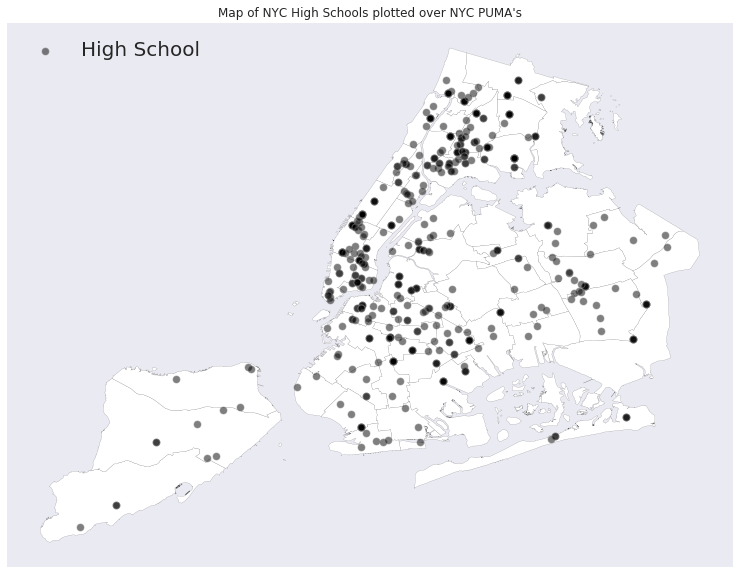

In [108]:
fig, ax = plt.subplots(figsize=(13,10))



ax.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(False) #latitude


pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax)
merge_df_nyc.plot(alpha=0.5, color="black", edgecolor="grey", lw=1, ax=ax, label="High School")
ax.legend(fontsize=20, loc=2)
plt.title("Map of NYC High Schools plotted over NYC PUMA's");


### Figure: In this map, I have plotted the location of NYC high schools (black/grey dots) and the Public Use Microdata Areas in New York City. The schools datapoint contains records where the average SAT score was recorded and may leave out some data that was not entered into the original SAT Scores 2012 from NYC OPEN DATA.

# Step 4 - Gather Asthma and drugs hospital discharge

In [112]:
!curl https://health.data.ny.gov/api/views/u4ud-w55t/rows.csv?accessType=DOWNLOAD > sparcs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  972M    0  972M    0     0  5569k      0 --:--:--  0:02:58 --:--:-- 5537kM    0  349M    0     0  5550k      0 --:--:--  0:01:04 --:--:-- 5606k0  762M    0     0  5598k      0 --:--:--  0:02:19 --:--:-- 5475k


In [113]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mbh329/PUIdata


In [114]:
!mv sparcs.csv $PUIDATA

In [115]:
sparcs_df = pd.read_csv('%s/sparcs.csv'%os.getenv("PUIDATA"))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [116]:
sparcs_df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,...,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,5511.95,5582.49
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,4783.20,5162.82
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,30 to 49,147,F,White,Not Span/Hispanic,...,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,3829.15,4056.52
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,0 to 17,147,F,White,Not Span/Hispanic,...,NaN,NaN,182357.0,NaN,NaN,0,N,Y,1108.20,1644.75
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,NaN,NaN,90301264.0,NaN,NaN,0,N,Y,3418.18,3370.87


In [117]:
#sparcs_df = sparcs_df[(sparcs_df['Hospital County'] == 'Kings') + (sparcs_df['Hospital County'] == 'Queens') + (sparcs_df['Hospital County'] == 'Bronx') + (sparcs_df['Hospital County'] == 'Richmond') + (sparcs_df['Hospital County'] == 'New York')]
                                                                            
#df[(df['Hospital County'] == 'Kings') + (df['Hospital County'] == ‘Queens’)]

In [118]:
sparcs_df = sparcs_df[(sparcs_df['Hospital County'] == 'Kings') + (sparcs_df['Hospital County'] == 'Queens') +\
                      (sparcs_df['Hospital County'] == 'Bronx') + (sparcs_df['Hospital County'] == 'Richmond')\
                      + (sparcs_df['Hospital County'] == 'New York')]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/computation/expressions.py:181: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [119]:
sparcs_df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Payment Typology 2,Payment Typology 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
954417,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,0 to 17,104,F,Black/African American,Not Span/Hispanic,...,Medicaid,NaN,197201.0,NaN,NaN,0,N,Y,10408.87,8618.38
954464,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,50 to 69,104,M,Black/African American,Not Span/Hispanic,...,NaN,NaN,186946.0,NaN,NaN,0,N,Y,4652.69,3852.35
954762,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,30 to 49,104,F,Other Race,Spanish/Hispanic,...,Medicaid,NaN,3872.0,NaN,NaN,0,N,Y,4044.20,3348.53
954951,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,0 to 17,104,M,Other Race,Spanish/Hispanic,...,Medicaid,NaN,261112.0,NaN,NaN,0,N,Y,9130.51,7559.92
954967,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,50 to 69,104,F,White,Not Span/Hispanic,...,NaN,NaN,253123.0,NaN,NaN,0,N,Y,4171.46,3453.90


## 4.2 calculate the fraction of asthma and drug related diagnoses per facility (3 points)

In [120]:
#!curl https://serv.cusp.nyu.edu/~fbianco/finaldata2018/discharge.csv > discharge.csv

In [121]:
#print("PUIdata", os.getenv("PUIDATA"))

In [122]:
sparcs_df.shape

(766557, 37)

In [123]:
sparcs_df['asthma'] = (sparcs_df['CCS Diagnosis Description'] == 'Asthma') | \
    (sparcs_df['CCS Diagnosis Description'] == 'Respiratory failure; insufficiency; arrest (adult)') | \
    (sparcs_df['CCS Diagnosis Description'] == 'Respiratory distress syndrome')


In [124]:
sparcs_df['drugs'] = (sparcs_df['CCS Diagnosis Description'] == 'Poisoning by psychotropic agents') | \
    (sparcs_df['CCS Diagnosis Description'] == 'Alcohol-related disorders') | \
    (sparcs_df['CCS Diagnosis Description'] == 'Substance-related disorders')


In [125]:
sparcs_df['total_discharge'] = 1
sparcs_df.head()

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,asthma,drugs,total_discharge
954417,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,0 to 17,104,F,Black/African American,Not Span/Hispanic,...,NaN,NaN,0,N,Y,10408.87,8618.38,True,False,1
954464,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,50 to 69,104,M,Black/African American,Not Span/Hispanic,...,NaN,NaN,0,N,Y,4652.69,3852.35,True,False,1
954762,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,30 to 49,104,F,Other Race,Spanish/Hispanic,...,NaN,NaN,0,N,Y,4044.20,3348.53,True,False,1
954951,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,0 to 17,104,M,Other Race,Spanish/Hispanic,...,NaN,NaN,0,N,Y,9130.51,7559.92,True,False,1
954967,New York City,Bronx,7000002.0,1165.0,Jacobi Medical Center,50 to 69,104,F,White,Not Span/Hispanic,...,NaN,NaN,0,N,Y,4171.46,3453.90,False,False,1


In [126]:
discharge = sparcs_df.groupby('Facility ID').sum().reset_index()
discharge.head()

,Facility ID,Operating Certificate Number,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs,asthma,drugs,total_discharge
0,1164.0,3.441900e+10,9893004,3236230,969668,3739297,95623,8927,2.807878e+09,2.353652e+09,7.586577e+08,0,7.157508e+07,6.843559e+07,0.0,2389.0,4917
1,1165.0,1.466920e+11,42163472,4765391,2341986,9546521,239604,41843,2.238913e+10,1.483045e+10,NaN,6495200,4.214969e+08,3.489927e+08,1123.0,1279.0,20956
2,1168.0,1.112231e+11,31968668,3202865,2250304,7482827,186011,32066,3.147042e+09,2.896329e+09,1.919679e+09,8155000,7.013724e+08,1.678174e+08,580.0,1006.0,15889
3,1169.0,3.055503e+11,87823800,5870166,5332109,14021718,352583,95331,2.820312e+10,3.206590e+10,1.401884e+10,823300,2.741680e+09,6.360669e+08,2105.0,323.0,43650
4,1172.0,1.619942e+11,46561704,4126536,2644766,8974944,223716,41921,1.569414e+11,7.064387e+10,NaN,7656600,2.534645e+08,2.442128e+08,1826.0,611.0,23142


In [127]:
discharge['asthmaRatio'] = discharge['asthma'] / discharge['total_discharge']
discharge['drugsRatio'] = discharge['drugs'] / discharge['total_discharge']

In [128]:
discharge.head()

,Facility ID,Operating Certificate Number,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs,asthma,drugs,total_discharge,asthmaRatio,drugsRatio
0,1164.0,3.441900e+10,9893004,3236230,969668,3739297,95623,8927,2.807878e+09,2.353652e+09,7.586577e+08,0,7.157508e+07,6.843559e+07,0.0,2389.0,4917,0.000000,0.485865
1,1165.0,1.466920e+11,42163472,4765391,2341986,9546521,239604,41843,2.238913e+10,1.483045e+10,NaN,6495200,4.214969e+08,3.489927e+08,1123.0,1279.0,20956,0.053588,0.061033
2,1168.0,1.112231e+11,31968668,3202865,2250304,7482827,186011,32066,3.147042e+09,2.896329e+09,1.919679e+09,8155000,7.013724e+08,1.678174e+08,580.0,1006.0,15889,0.036503,0.063314
3,1169.0,3.055503e+11,87823800,5870166,5332109,14021718,352583,95331,2.820312e+10,3.206590e+10,1.401884e+10,823300,2.741680e+09,6.360669e+08,2105.0,323.0,43650,0.048225,0.007400
4,1172.0,1.619942e+11,46561704,4126536,2644766,8974944,223716,41921,1.569414e+11,7.064387e+10,NaN,7656600,2.534645e+08,2.442128e+08,1826.0,611.0,23142,0.078904,0.026402


# Discussion- 
### 

## 4.3 - find the location of each facility (4 points)

In [129]:
#I had to resort to this after it began to mess with my original puma shp data 

import urllib
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib

#try:
#    import urllib2 as ulib
#except ImportError:
#    import urllib3 as ulib

try:
    from StringIO import BytesIO as io
except ImportError:
    from io import BytesIO as io

try:
    from urllib import urlencode as urlencode
except ImportError:
    from urllib.parse import urlencode as urlencode
    
try:
    from urllib import urlopen as urlopen
except ImportError:
    from urllib.request import urlopen as urlopen
    
try:
    from urllib2 import HTTPError as HTTPError
except ImportError:
    from urllib.error import HTTPError as HTTPError

In [130]:
API_URL = 'https://fb55.carto.com:443/api/v2/sql?q='

def queryCartoDB(query, formatting = 'CSV', source = API_URL):
    '''queries carto datasets from a given carto account
    Arguments: 
    query - string: a valid sql query string
    format - outlut format  OPTIONAL (default CSV)
    source - a valid sql api endpoint OPTIONAL (default carto fb55 account)
    Returns:
    the return of the sql query AS A STRING
    NOTES:
    designed for the carto API, tested only with CSV return format'''
    
    
    data = urlencode({'format': formatting, 'q': query}).encode("utf-8")
    try:
        response = urlopen(source, data)
        return response.read()
    except HTTPError as e:
        raise (ValueError('\n'.join(ast.literal_eval(e.readline())['error'])))
        
def get_data(query):
    try:
        return pd.read_csv(io(queryCartoDB(query)), sep = ',')
    except ValueError as v:
        print (str(v))

In [131]:
test = '''
SELECT *
FROM nyc_facilities
'''

In [132]:
query= '''SELECT facility_id, facility_latitude, facility_longitude FROM nyc_facilities'''   
facility_loc= get_data(query)
facility_loc.head()

,facility_id,facility_latitude,facility_longitude
0,1320,40.654518,-73.945045
1,6448,40.653175,-73.886772
2,6754,40.689243,-73.956383
3,1206,40.846165,-73.904655
4,1207,40.814503,-73.919029


In [133]:
facility = facility_loc.merge(discharge, left_on='facility_id', right_on='Facility ID')

In [134]:
facility

,facility_id,facility_latitude,facility_longitude,Facility ID,Operating Certificate Number,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,...,Operating Provider License Number,Other Provider License Number,Birth Weight,Total Charges,Total Costs,asthma,drugs,total_discharge,asthmaRatio,drugsRatio
0,1320,40.654518,-73.945045,1320.0,1.185136e+11,34059136,2780147,2962375,6911981,172478,...,3.569197e+10,2.664440e+10,4634600,3.934543e+08,2.389099e+08,571.0,119.0,16928,0.033731,0.007030
1,1309,40.677940,-73.937515,1309.0,7.461715e+10,21443896,3547199,872071,5371594,135886,...,1.635356e+09,NaN,0,3.658298e+08,1.123376e+08,422.0,1645.0,10658,0.039595,0.154344
2,1175,40.847294,-73.844658,1175.0,2.130103e+10,6122516,277020,260556,968149,24056,...,3.227109e+08,NaN,0,1.466062e+08,7.954779e+07,25.0,0.0,3043,0.008216,0.000000
3,1164,40.831772,-73.903656,1164.0,3.441900e+10,9893004,3236230,969668,3739297,95623,...,2.353652e+09,7.586577e+08,0,7.157508e+07,6.843559e+07,0.0,2389.0,4917,0.000000,0.485865
4,1165,40.857388,-73.846741,1165.0,1.466920e+11,42163472,4765391,2341986,9546521,239604,...,1.483045e+10,NaN,6495200,4.214969e+08,3.489927e+08,1123.0,1279.0,20956,0.053588,0.061033
5,1168,40.894569,-73.861420,1168.0,1.112231e+11,31968668,3202865,2250304,7482827,186011,...,2.896329e+09,1.919679e+09,8155000,7.013724e+08,1.678174e+08,580.0,1006.0,15889,0.036503,0.063314
6,1169,40.879951,-73.880562,1169.0,3.055503e+11,87823800,5870166,5332109,14021718,352583,...,3.206590e+10,1.401884e+10,823300,2.741680e+09,6.360669e+08,2105.0,323.0,43650,0.048225,0.007400
7,1172,40.817661,-73.924210,1172.0,1.619942e+11,46561704,4126536,2644766,8974944,223716,...,7.064387e+10,NaN,7656600,2.534645e+08,2.442128e+08,1826.0,611.0,23142,0.078904,0.026402
8,1176,40.853909,-73.891014,1176.0,1.440953e+11,41417020,5774834,3451567,9468774,238713,...,5.298051e+10,NaN,3809200,5.366172e+08,1.471288e+08,910.0,4177.0,20585,0.044207,0.202915
9,1178,40.843609,-73.911545,1178.0,1.736700e+11,49917720,3739251,2836774,9551126,239232,...,3.441992e+10,7.647417e+09,7224700,3.030933e+08,3.553715e+08,1351.0,337.0,24810,0.054454,0.013583


In [135]:
facility['lonlat'] = list(zip(facility.facility_longitude, facility.facility_latitude))
#zip latlong

In [136]:
facility['geometry']= facility[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

#create point geometry

In [137]:
 facility.shape

(38, 24)

In [138]:
facility_loc = gpd.GeoDataFrame(facility) #create gpd 

In [139]:
facility_loc.crs = from_epsg(4326) #set lat long geo 

In [140]:
facility_loc.to_crs(epsg=2263, inplace=True) #convert to state plane

In [144]:
facility_loc.tail()

,facility_id,facility_latitude,facility_longitude,Facility ID,Operating Certificate Number,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,...,Birth Weight,Total Charges,Total Costs,asthma,drugs,total_discharge,asthmaRatio,drugsRatio,lonlat,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
33,1737,40.516773,-74.196808,1737.0,6.826802e+10,19610964,3084168,1402852,4650052,117751,...,0,2.486819e+08,6.914393e+07,208.0,2684.0,9747,0.021340,0.275367,"(-74.196808, 40.516773)",POINT (929528.9812968108 127612.4369535423)
34,1738,40.635807,-74.106674,1738.0,1.209593e+11,34747240,3062180,2346533,7348784,182021,...,9399800,5.124188e+08,1.471856e+08,516.0,192.0,17270,0.029878,0.011118,"(-74.106674, 40.635807)",POINT (954642.8717072887 170936.0388781019)
35,1740,40.584141,-74.086998,1740.0,2.438514e+11,70049792,5654766,4076375,13541222,339048,...,9694200,1.279949e+09,4.159721e+08,662.0,252.0,34816,0.019014,0.007238,"(-74.086998, 40.584141)",POINT (960085.204667164 152106.7444696231)
36,3058,40.849575,-73.845055,3058.0,1.897002e+11,54525200,4182386,3711228,11378510,282984,...,12675900,1.449936e+09,3.260559e+08,556.0,95.0,27100,0.020517,0.003506,"(-73.845055, 40.849575)",POINT (1027116.862523336 248838.4564871181)
37,1286,40.655066,-73.912579,1286.0,1.154045e+11,33165808,3181094,1340079,6598008,164600,...,4164900,4.498003e+08,2.048506e+08,899.0,185.0,16484,0.054538,0.011223,"(-73.912579, 40.655066)",POINT (1008506.501038645 177946.6958043299)


In [145]:
facility_loc.crs

{'init': 'epsg:2263', 'no_defs': True}

In [146]:
facility_puma = gpd.sjoin(pumashp, facility_loc, op="contains")

In [147]:
facility_puma.dtypes #gpd of hospital fac in pumas

puma                                  object
shape_area                           float64
shape_leng                           float64
geometry                              object
index_right                            int64
facility_id                            int64
facility_latitude                    float64
facility_longitude                   float64
Facility ID                          float64
Operating Certificate Number         float64
Discharge Year                         int64
CCS Diagnosis Code                     int64
CCS Procedure Code                     int64
APR DRG Code                           int64
APR MDC Code                           int64
APR Severity of Illness Code           int64
Attending Provider License Number    float64
Operating Provider License Number    float64
Other Provider License Number        float64
Birth Weight                           int64
Total Charges                        float64
Total Costs                          float64
asthma    

## Discussion: The final facility_puma df had 38 observations and 11 features which i will further aggegate down the line. I choose to keep some columns that I will later throw out for reference and to learn more about the dataset. 

# STEP 5

## 5.1

In [148]:
#facility = facility_loc.merge(discharge_sol, left_on='facility_id', right_on='Permanent Facility Id') 
           #merge facility data together, comment on data lost                

In [149]:
#facility.columns

In [150]:
#facility.drop(['facility_latitude', 'facility_longitude', 'lonlat',
#                   'Permanent Facility Id',], axis=1, inplace=True)
#'geometry', 'facility_id' 'asthmaRatio', 'drugsRatio'

In [151]:
#facility.shape

In [152]:
#facility_shp = gpd.GeoDataFrame(facility)

In [153]:
#facility_shp.crs

In [154]:
#facility_shp = from_epsg(2263)

In [155]:
#facility_puma = gpd.sjoin(pumashp, facility_shp, op="contains")

## STEP 

In [156]:
merge_df_nyc.head()

,DBN,mathavg,sat_avg,School Year,Location Code,# Schools,Schools in Building,Major N,Oth N,NoCrim N,...,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,Latitude,Longitude,lonlat,geometry
0,01M292,404.0,374.000000,2013-14,M292,4,Henry Street School for International Studies ...,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,40.713684,-73.986336,"(-73.986336, 40.713684)",POINT (988037.9875462858 199291.1269536453)
1,01M448,423.0,390.666667,2013-14,M448,1,University Neighborhood High School,1.0,0.0,2.0,...,0.0,0.35,1.06,1.09,0.73,0.50,40.712399,-73.984497,"(-73.984497, 40.712399)",POINT (988547.8851731399 198823.0473264912)
2,01M450,402.0,383.000000,2013-14,M450,1,East Side Community School,1.0,4.0,0.0,...,1.0,0.33,1.32,1.76,0.83,0.59,40.729589,-73.982555,"(-73.982555, 40.729589)",POINT (989085.0171372326 205085.9939804055)
3,01M458,401.0,391.333333,2013-14,M458,2,Forsyth Satellite Academy | Cascades High Sch...,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,40.722520,-73.990728,"(-73.990728, 40.72252)",POINT (986820.0793774576 202510.1927500119)
4,01M509,433.0,402.333333,2013-14,M509,3,Marta Valle High School | Lower East Side Pre...,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,40.720581,-73.985645,"(-73.985645, 40.720581)",POINT (988229.1374852278 201803.9454043765)


In [157]:
pumashp.head()

,puma,shape_area,shape_leng,geometry
index_left,,,,
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,..."
1,3702,1.889860e+08,106050.002487,"POLYGON ((1020341.578796388 259179.926391553, ..."
2,3703,2.670108e+08,303565.021099,(POLYGON ((1042822.450195312 243439.8142089319...
3,3704,1.062129e+08,47970.901277,"POLYGON ((1026308.769592285 256767.6972045382,..."
4,4015,8.105438e+07,50007.415288,"POLYGON ((993894.9708251959 176725.497436468, ..."


In [158]:
pumashp_SVH = gpd.sjoin(pumashp, merge_df_nyc, op="contains")

In [159]:
pumashp_SVH.columns

Index(['puma', 'shape_area', 'shape_leng', 'geometry', 'index_right', 'DBN',
       'mathavg', 'sat_avg', 'School Year', 'Location Code', '# Schools',
       'Schools in Building', 'Major N', 'Oth N', 'NoCrim N', 'Prop N',
       'Vio N', 'avg_major_crime', 'avg_other_crime', 'avg_no_crime',
       'avg_prop_crime', 'avg_vio_crime', 'Latitude', 'Longitude', 'lonlat'],
      dtype='object')

In [160]:
pumashp_SVH.drop(['index_right', 'DBN',
        'School Year', 'Location Code', '# Schools',
       'Schools in Building', 'Latitude', 'Longitude', 'lonlat'], axis=1, inplace=True)
                 
#'puma', 'shape_area', 'shape_leng', 'geometry', 'mathavg', 'sat_avg',
#'Major N', 'Oth N', 'NoCrim N', 'Prop N','Vio N', 'avg_major_crime', 'avg_other_crime', 
#    'avg_no_crime',   'avg_prop_crime', 'avg_vio_crime'

In [161]:
print("we lost {:.1f} per cent of the data ({:d} observations) in the merge".format(
    (merge_df_nyc.shape[0] - pumashp_SVH.shape[0]) / merge_df_nyc.shape[0] * 100, 
    pumashp_SVH.shape[0] - merge_df_nyc.shape[0]))

we lost 0.6 per cent of the data (-3 observations) in the merge


In [162]:
pumashp_SVH.groupby('puma').count()

,shape_area,shape_leng,geometry,mathavg,sat_avg,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime
puma,,,,,,,,,,,,,,,
3701,11,11,11,11,11,11,11,11,11,11,4,4,4,4,4
3702,9,9,9,9,9,9,9,9,9,9,0,0,0,0,0
3703,5,5,5,5,5,5,5,5,5,5,0,0,0,0,0
3704,8,8,8,6,6,8,8,8,8,8,2,2,2,2,2
3705,28,28,28,27,27,28,28,28,28,28,6,6,6,6,6
3707,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0
3708,13,13,13,12,12,13,13,13,13,13,1,1,1,1,1
3709,19,19,19,12,12,19,19,19,19,19,0,0,0,0,0
3710,22,22,22,17,17,22,22,22,22,22,2,2,2,2,2


In [163]:
pumashp_SVH.shape

(461, 16)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


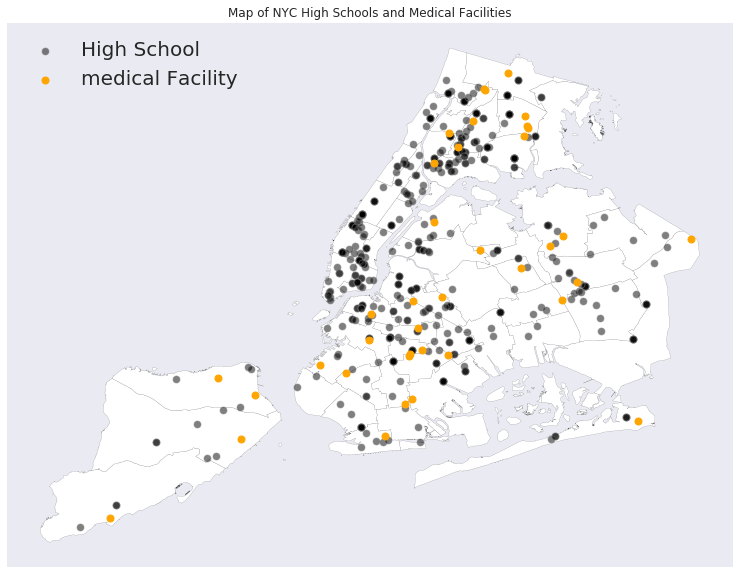

In [164]:
fig, ax = plt.subplots(figsize=(13,10))



ax.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(False) #latitude


pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax)
merge_df_nyc.plot(alpha=0.5, color="black", edgecolor="grey", lw=1, ax=ax, label="High School")
facility_loc.plot(color="orange", lw=1, ax=ax, label="medical Facility")
plt.title("Map of NYC High Schools and Medical Facilities");

ax.legend(fontsize=20, loc=2)

plt.show()

### Figre: In this figure, i have plotted the # of high schools (blue points) with the number of medical facilities (orange) against NYC PUMA's. PUMAs approximate NYC community districts: "PUMAs have a minimum population of 100,000, are aggregated from census tracts, and approximate Community Districts (CDs), or combinations of CDs (There are 59 CDs and only 55 NYC PUMAs because of such combinations). This geography is also used for disseminating American Community Survey (ACS) estimates." (NYC OPEN DATA). You can see that the distribution of schools and medical facilites is unequally distributed on the map with specific clustering in Manhattan which has a high density fo schools and a higher average of medical facilites by puma. In order ro properly asses the impact of the density of these points we will have to standardize the data as to get an equal representation of SAT scores, crime, and the health ratios to find any correlation.

In [165]:
pumashp_SVH.fillna({'avg_major_crime':0, 'avg_other_crime':0, 'avg_no_crime':0, 'avg_prop_crime':0,'avg_vio_crime':0}, inplace=True)

#here i am making averge crime data 0

,puma,shape_area,shape_leng,geometry,mathavg,sat_avg,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",356.0,320.666667,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",379.0,371.666667,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",333.0,311.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",420.0,423.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",371.0,368.666667,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",648.0,640.000000,0.0,0.0,0.0,0.0,0.0,0.35,1.06,1.09,0.73,0.50
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",393.0,385.666667,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",688.0,656.333333,0.0,2.0,5.0,1.0,0.0,2.13,9.06,14.50,6.06,3.56
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",408.0,393.666667,1.0,1.0,1.0,1.0,1.0,0.56,2.40,3.56,1.36,1.05
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",426.0,418.333333,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


In [166]:
standard_data = pumashp_SVH.drop(['shape_area', 'shape_leng', 'geometry'], axis=1)

#
#drop any data that isn't a flot or interger for standarization purposes

#, 'puma' shape_area', 'shape_leng', 'geometry', 'mathavg', 'sat_avg',
#       'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N', 'avg_major_crime',
 #      'avg_other_crime', 'avg_no_crime', 'avg_prop_crime', 'avg_vio_crime'

In [167]:
standard_data.head(5)

,puma,mathavg,sat_avg,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime
0,3701,356.0,320.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3701,379.0,371.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3701,333.0,311.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3701,420.0,423.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3701,371.0,368.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
standard_data_clean = standard_data.dropna(how='all')
standard_data_clean.shape

#drop any nans that might still be in the df

(461, 13)

In [169]:
standard_data_clean.dtypes 

#all floats proceed to standarize

puma                object
mathavg            float64
sat_avg            float64
Major N            float64
Oth N              float64
NoCrim N           float64
Prop N             float64
Vio N              float64
avg_major_crime    float64
avg_other_crime    float64
avg_no_crime       float64
avg_prop_crime     float64
avg_vio_crime      float64
dtype: object

In [170]:
standard_school_puma = pumashp_SVH.merge(standard_data_clean)

In [171]:
standard_school_puma.tail()

,puma,shape_area,shape_leng,geometry,mathavg,sat_avg,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime
542,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,396.0,378.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,419.0,417.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
544,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,379.0,364.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,401.0,385.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,385.0,381.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:

every_puma = standard_school_puma.merge(facility_puma, on="puma")
every_puma.shape



#standard_school_puma.groupby(['puma']).mean()[['Major N', 'Oth N', 'NoCrim N', 'Prop N', \
#            'Vio N', 'avg_major_crime', 'avg_other_crime', 'avg_no_crime', 'avg_prop_crime', 'avg_vio_crime', 'mathavg', 'sat_avg']]



(381, 43)

In [173]:
every_puma.drop(['Facility ID', 'Operating Certificate Number', 'Discharge Year',
       'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code',
       'APR MDC Code', 'APR Severity of Illness Code', 'shape_area_y', 'shape_leng_y', 'geometry_y',
       'Attending Provider License Number', 'index_right', 'total_discharge',
       'Operating Provider License Number', 'Other Provider License Number', 'facility_id', 'facility_latitude', 'facility_longitude', 'asthma', 'drugs',
       'Birth Weight', 'Total Charges', 'Total Costs', 'lonlat'], axis=1, inplace=True) 
                
#'puma', 'shape_area_x', 'shape_leng_x', 'geometry_x', 'mathavg',
#       'sat_avg', 'Major N', 'Oth N', 'NoCrim N', 'Prop N', 'Vio N',
#      'avg_major_crime', 'avg_other_crime', 'avg_no_crime', 'avg_prop_crime',
#       'avg_vio_crime', 'shape_area_y', 'shape_leng_y', 'geometry_y',
#       'index_right', 'facility_id', 'facility_latitude', 'facility_longitude', 'asthma', 'drugs',
#      'total_discharge', 'asthmaRatio', 'drugsRatio', 'lonlat'],




In [174]:
every_puma_final = every_puma.groupby(['puma']).mean()[['Major N', 'Oth N', 'NoCrim N', 'Prop N', \
            'Vio N', 'avg_major_crime', 'avg_other_crime', 'avg_no_crime', 'avg_prop_crime', 'avg_vio_crime', 'mathavg', 'sat_avg']]

In [175]:
every_puma_final.shape

(28, 12)

# STEP 6 checking collinearity and covariance of the data










# STEP 6.1 - plot SAT features against each other and assess collinearity (4 points)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


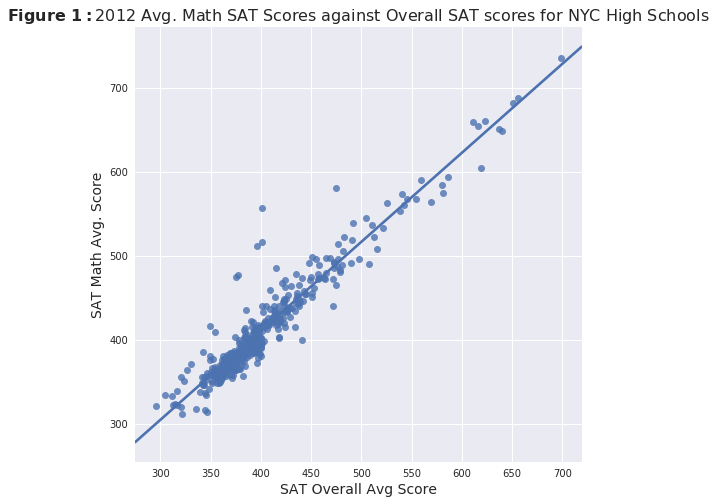

In [176]:
ax = plt.figure(figsize=(8,8)).add_subplot(111)

#line of best fit
sns.regplot(standard_school_puma.sat_avg, standard_school_puma.mathavg,
           ci=None, ax=ax)

ax.set_ylabel('SAT Math Avg. Score', fontsize=14)
ax.set_xlabel('SAT Overall Avg Score', fontsize=14)
ax.set_title(r"$\bf{Figure\ 1:}$" + "2012 Avg. Math SAT Scores against Overall SAT scores for NYC High Schools", fontsize=16)

plt.show()

### Figure 6.1 - In this figure, I have plotted the the average SAT math scores in 2012 as a function of the Overall SAT score (reading, writing, math). You can see that they seem to be correlated linearily with each other which would make sense as the math score is inclusive of the overall average score. They follow a direct linear relationship as math scores increase so do overall scores.

# step 6.2- plot the SAT feature by PUMA against 3 of the crime features (3 points)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


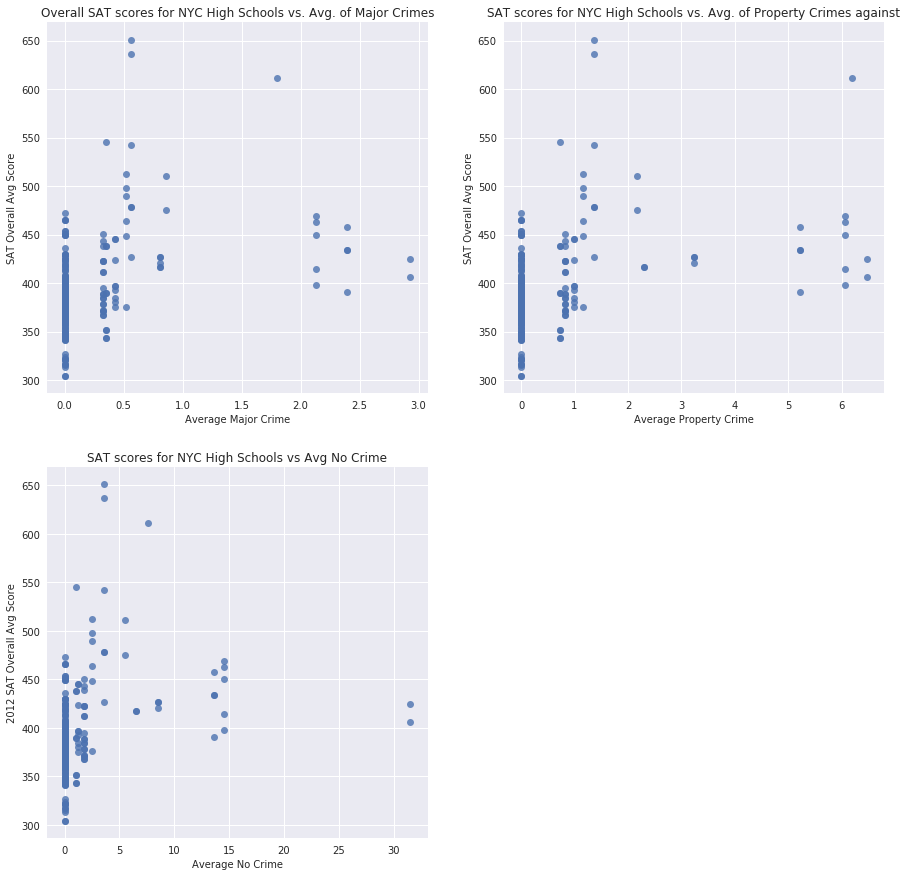

In [177]:
fig = plt.figure(figsize=(15,15)) 
#fig = pl.figure(figsize=(15,12))

ax20 = fig.add_subplot(221)


sns.regplot(every_puma.avg_major_crime, every_puma.sat_avg,
           ci=None, fit_reg=False, ax=ax20)

ax20.set_ylabel('SAT Overall Avg Score', fontsize=10)
ax20.set_xlabel('Average Major Crime', fontsize=10)
ax20.set_title("Overall SAT scores for NYC High Schools vs. Avg. of Major Crimes")

######################################################

ax21 = fig.add_subplot(222)

#line of best fit
sns.regplot(every_puma.avg_prop_crime, every_puma.sat_avg, 
           ci=None,fit_reg=False, ax=ax21)

ax21.set_ylabel('SAT Overall Avg Score', fontsize=10)
ax21.set_xlabel('Average Property Crime', fontsize=10)
ax21.set_title("SAT scores for NYC High Schools vs. Avg. of Property Crimes against")

###################################################

ax22 = fig.add_subplot(223)

#line of best fit
sns.regplot(every_puma.avg_no_crime, every_puma.sat_avg,
           ci=None, fit_reg=False, ax=ax22)

ax22.set_ylabel('2012 SAT Overall Avg Score', fontsize=10)
ax22.set_xlabel('Average No Crime', fontsize=10)
ax22.set_title("SAT scores for NYC High Schools vs Avg No Crime")

plt.show()

### Figure 6.2.1: In these figures,  I have plotted the the overall SAT average of new york city high schools against 3 crime features (avg # major crime, avg. # of property crime, and avg no crime).  When comparing the graphs we see that the average # of no crime in NYC high schools is the most correlated of the 3 crime features to the Overall SAT average; this particular trend has a best fit line with a much lower gradient than the other two graphs meaning that average of no crime is spread out along the x axis much more. However, none of the graphs seem to be a good correlator to the Overall SAT score.

Figure 6.2.2: In this figure i have plotted the average property crime (13/14) as a function of the 2012 SAT Overall Average Score in New York City High schools.

# SAT AVERAGE BY ASTHMA DATA PLOTS

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


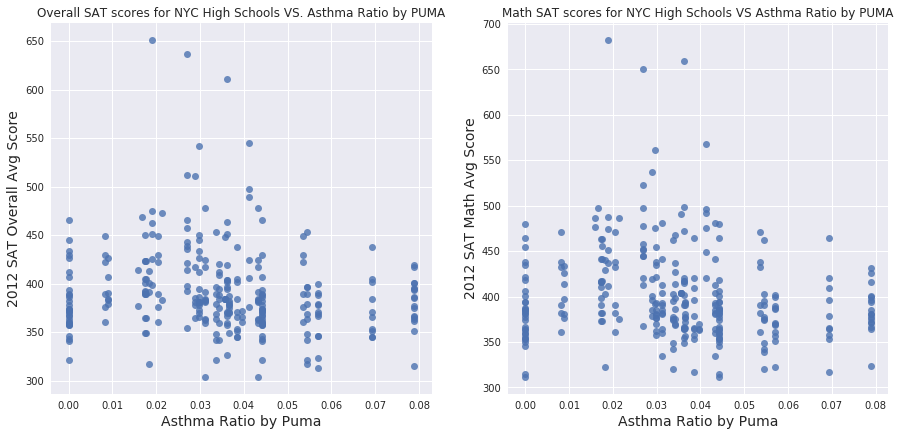

In [178]:
fig = plt.figure(figsize=(15,15)) 

ax23 = fig.add_subplot(221)
sns.regplot(every_puma.asthmaRatio,every_puma.sat_avg, 
           ci=None, fit_reg=False, ax=ax23)

ax23.set_ylabel('2012 SAT Overall Avg Score', fontsize=14)
ax23.set_xlabel('Asthma Ratio by Puma', fontsize=14)
ax23.set_title( "Overall SAT scores for NYC High Schools VS. Asthma Ratio by PUMA")


###################################################

ax24 = fig.add_subplot(222)

sns.regplot(every_puma.asthmaRatio,every_puma.mathavg, 
           ci=None, fit_reg=False, ax=ax24)

ax24.set_ylabel('2012 SAT Math Avg Score', fontsize=14)
ax24.set_xlabel('Asthma Ratio by Puma', fontsize=14)
ax24.set_title( "Math SAT scores for NYC High Schools VS Asthma Ratio by PUMA")

plt.show()

### Figure: In this figure, I have compared the of the Average OVerall SAT score and the Average Math SAT score as a function ASthma ratio in NYC Pumas. When comparing these two plots, it seems that the correlation between the two studied features is rather weak. This could be because either the data is has little correlation or that PUMA data when aggreated at the health level would better represent the population living in that particular area and not neccasarily the the school population as many students travel pretty reasonable distance to go to high school as they are not always 'zoned' schools. There does seem to be relatively high rates respitory related illnesses at the puma level which is something that could be interesting to look into it (when compared to drugs health stat).

# DRUGS RATIO BY SAT FEATURES PLOTS

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


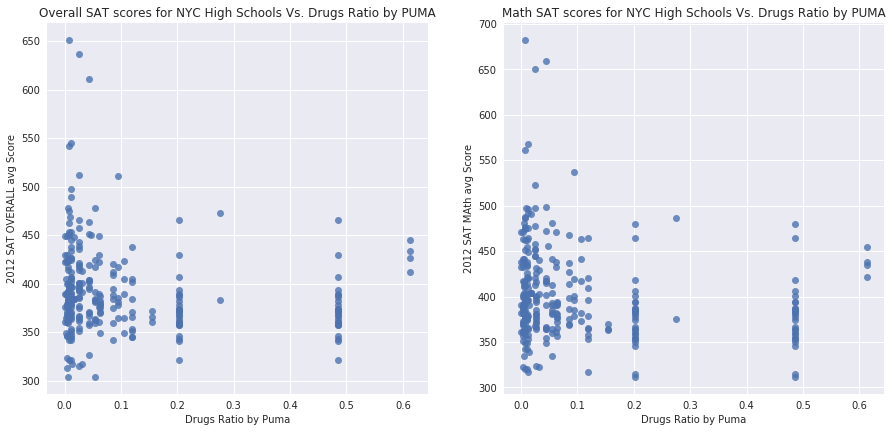

In [179]:
#fig = pl.figure(figsize=(10,10))
fig = plt.figure(figsize=(15,15))

ax10 = fig.add_subplot(221)
sns.regplot(every_puma.drugsRatio, every_puma.sat_avg,
           ci=None, fit_reg=False, ax=ax10)

ax10.set_ylabel('2012 SAT OVERALL avg Score', fontsize=10)
ax10.set_xlabel('Drugs Ratio by Puma', fontsize=10)
ax10.set_title( "Overall SAT scores for NYC High Schools Vs. Drugs Ratio by PUMA")

#############################################

ax11 = fig.add_subplot(222)
sns.regplot(every_puma.drugsRatio, every_puma.mathavg,
           ci=None, fit_reg=False, ax=ax11)

ax11.set_ylabel('2012 SAT MAth avg Score', fontsize=10)
ax11.set_xlabel('Drugs Ratio by Puma', fontsize=10)
ax11.set_title( "Math SAT scores for NYC High Schools Vs. Drugs Ratio by PUMA")

plt.show()

### figure: In this figure I have plotted the drugs ratio by PUMA as a function of the SAT overall average and the SAT math average. Again from these two plots and features variables there is a very weak correlation between the two datasets and would leave me to believe that 

In [180]:
#plt.figure(figsize = (20, 20))
#sns.heatmap(every_puma_final, xticklabels=every_puma_final.columns.values, \
#            yticklabels=every_puma_final.columns.values, cmap='seismic', annot=True)
#plt.xticks(rotation='vertical')
#plt.title('Covariance Matrix', fontsize=25)

# STEP 7 - MAPPING

### plot choropleths (maps where each area is colorcoded by the value of a variable) of

### the SAT features,
### the 3 chosen school crime features
### the two medical discharge fieatures
### the income if you have it from the extra credit
### remember your visualization lecture! plot it in a way that allows comparison

### replacing nan values with 0 againg becasue the 1st one didn't work 

In [181]:
standard_school_puma.head()#pumashp_SVH.fillna({'avg_major_crime':0, 'avg_other_crime':0, 'avg_no_crime':0, 'avg_prop_crime':0,'avg_vio_crime':0}, inplace=True)

,puma,shape_area,shape_leng,geometry,mathavg,sat_avg,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime
0,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",356.0,320.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",379.0,371.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",333.0,311.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",420.0,423.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3701,9.792852e+07,53227.144461,"POLYGON ((1011902.590637204 271699.9625853957,...",371.0,368.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3142: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


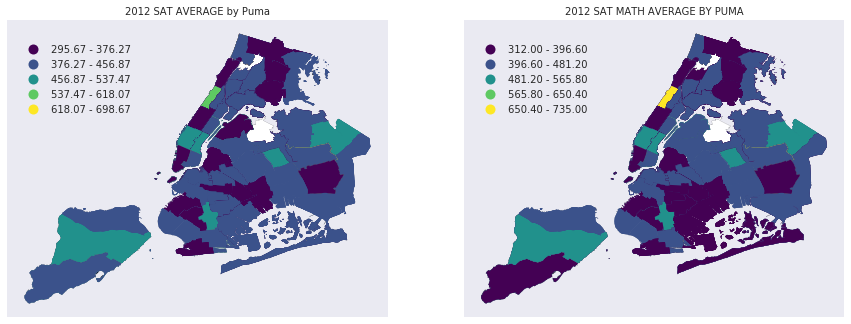

In [189]:
fig = pl.figure(figsize=(15,12))

ax3 = fig.add_subplot(221)
pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax3)
standard_school_puma.plot(column='sat_avg', cmap='viridis',alpha=1,linewidth=0.2,k=5,ax=ax3,\
                scheme="equal_interval", legend=True)
ax3.set_title("2012 SAT AVERAGE by Puma", fontsize=10)
ax3.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax3.get_yaxis().set_visible(False)
leg = ax3.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
######################################################
ax4 = fig.add_subplot(222)
pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax4)
standard_school_puma.plot(column='mathavg', cmap='viridis',alpha=1,linewidth=0.2,ax=ax4,\
                scheme="equal_interval", legend=True)

#leg.set_bbox_to_anchor((0.2, 0.8, 0.2, 0.2))
ax4.set_title("2012 SAT MATH AVERAGE BY PUMA", fontsize=10)
ax4.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax4.get_yaxis().set_visible(False)
leg = ax4.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
plt.show()

### Figure: In these two choropleth maps i have plotted SAT Overall Average(standardized) and the SAT Math Average across NYC PUMAs. As you can see there are two pumas in NYC that were not assigned data which is a problem during the merge which is  because those particular PUMAs did not have any schools located in them (perhaps occupied by mostly park or very residential areas) which is an interesting notion because that could mean these areas are underserved educational (a discussion for another time). 

### As for the distribution of the SAT scores over PUMA's, you can see that there is minimal difference between the distributions as noted before. But there are some interesting occurances: 

### 1. The upper west side has the highest average scores in both maps which could be expected as the area is generally seen as "upper class" and a well off socio-economic neighborhood. 

### 2. Generally neighborhoods that are historically known as having a poor socio-economic status have lower SAT scores including the Central Bronx and southern Brooklyn and the rockaways out in Queens.

### 3. Midtown Manhattan with a high # of schools is middling in the range.

### Notes on my Map: I choose to break the chorolpleth up into egqual intevals spread out across 5 values which i choose because i thought they would highlight  disparity the best. However, from my archaic knowledge of the SAT's i don' think you can get less than 300 so keep that in mind when looking at the lower range of SAT scores.



Figure: EXPLAIN

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


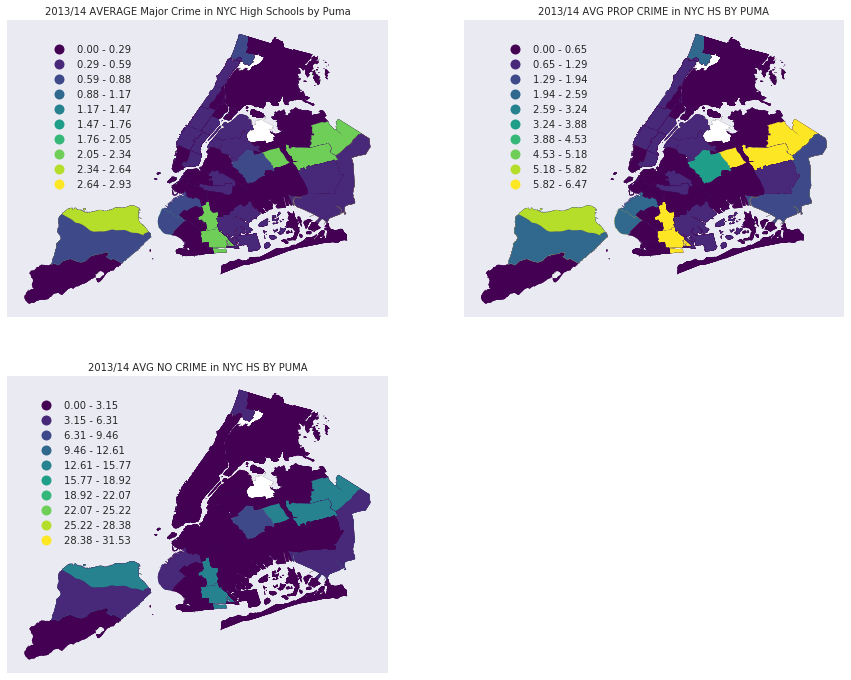

In [188]:
fig = pl.figure(figsize=(15,12))

ax5 = fig.add_subplot(221)
pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax5)
standard_school_puma.plot(column='avg_major_crime', cmap='viridis',alpha=1,linewidth=0.2,k=10,\
                scheme="equal_interval", legend=True, ax=ax5)
ax5.set_title("2013/14 AVERAGE Major Crime in NYC High Schools by Puma", fontsize=10)
ax5.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax5.get_yaxis().set_visible(False)
leg = ax5.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
######################################################
ax6 = fig.add_subplot(222)
pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax6)
standard_school_puma.plot(column='avg_prop_crime', cmap='viridis',alpha=1,linewidth=0.2,ax=ax6,\
                scheme="equal_interval", legend=True, k=10)


ax6.set_title("2013/14 AVG PROP CRIME in NYC HS BY PUMA", fontsize=10)
ax6.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax6.get_yaxis().set_visible(False)
leg = ax6.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
#########################################################
ax7 = fig.add_subplot(223)
pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax7)
standard_school_puma.plot(column='avg_no_crime', cmap='viridis',alpha=1,linewidth=0.2, k= 10,\
                scheme="equal_interval", legend=True, ax=ax7)

ax7.set_title("2013/14 AVG NO CRIME in NYC HS BY PUMA", fontsize=10)
ax7.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax7.get_yaxis().set_visible(False)
leg = ax7.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))

plt.show()

### Figure: Here I have plotted 3 differnt chloropleth maps with 3 crime features (avg major crim, avg prop crime, avg no crime) as a function of my chosen SAT feature(SAT OVerall Score). Here we see that certain areas we saw in our last set of graphs actually have higher rates of major and property crime then would be expected if we are thinking that SAT and crime are correlated. 

### 1- Property crime is overwhelminly more prevelant than major crime across the city but especialy high in areas in western queens, coney island area of Brooklyn, and in mid staten island. It is relatively lower almost everywhere else in the city.

### 2- It would be interesting to look into the data literature to see how crime is classified and where the threshold is. I imagine that anything above a felony is treated as a "major" crime. 

### 3- Like most crime data, I am sure that crime is heavily underrported for a various # of factors including suppresion by schools that don't report crime and deal with it "inhouse." This is a personal anecdote as someone who went to NYC public schools.

### 4- It would be interesting to see if charter schools are listed in the data, if not would be cool to see how they perform based on all the discussion about charter vs public(private schools as well)


### Notes on plotting techniques: As mentioned before 2 pumas are missing data. used equal interval with 10 ranges.

### Figure:  

# STEP 7.3 - ASTHMA/RATIO BY PUMA MAPS

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


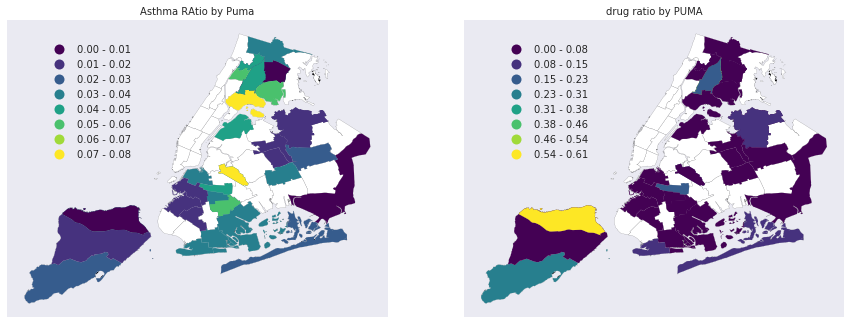

In [190]:
fig = pl.figure(figsize=(15,12))

ax1 = fig.add_subplot(221)
pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax1)
facility_puma.plot(column='asthmaRatio', cmap='viridis',alpha=1,linewidth=0.2, k= 8, 
                scheme="equal_interval", legend=True, ax=ax1)
ax1.set_title("Asthma RAtio by Puma", fontsize=10)
ax1.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax1.get_yaxis().set_visible(False)
leg = ax1.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
######################################################
ax2 = fig.add_subplot(222)
pumashp.plot(color="white",edgecolor="black", lw=.1, ax=ax2)
facility_puma.plot(column="drugsRatio", cmap='viridis',alpha=1,linewidth=0.2, k= 8, 
                scheme="equal_interval", legend=True, ax=ax2)# ax=ax2)


ax2.set_title("drug ratio by PUMA", fontsize=10)
ax2.get_xaxis().set_visible(False) #takes away axis from the map x,y axis relates to Lat, Long 
ax2.get_yaxis().set_visible(False)
leg = ax2.get_legend()
leg.set_bbox_to_anchor((0.35, 0.95, 0, 0))
plt.show()


### Figure: Here i have plotted NYC health data based on respitory conditions and drug conditions on the puma level. There is a bunch of missing data on the PUMA level which is partially due to the lack of medical facilities at the puma level across NYC which doesn't make for a great analysis of the affect of health conditions on our previously mentioned features.

### 1- In the asthma ratio, we see high levels of respitory conditions in the South bronx which historically has one of the highest rates of respitory rates in the country. Socio-economical and health have been closely documeted and this certainly holds true for the Bronx.

### 2- In the drug ratio ma, we see surprisngly high rate of drug related conditions in southern staten island which is not something I would have expected. in terms of any of the other features we have mapped it doesn't seem to be correlated as that area has no indicative traits that would suggest a high rate of drug related issues.



# STEP 8 start with linear modeling

## 8.1 create a multivariate-linear model using only the crime in school features, but using all 10 of them, predicting the chosen SAT feature

In [185]:
every_puma.head()

,puma,shape_area_x,shape_leng_x,geometry_x,mathavg,sat_avg,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,asthmaRatio,drugsRatio
0,3702,1.889860e+08,106050.002487,"POLYGON ((1020341.578796388 259179.926391553, ...",365.0,378.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
1,3702,1.889860e+08,106050.002487,"POLYGON ((1020341.578796388 259179.926391553, ...",391.0,378.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
2,3702,1.889860e+08,106050.002487,"POLYGON ((1020341.578796388 259179.926391553, ...",376.0,370.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
3,3702,1.889860e+08,106050.002487,"POLYGON ((1020341.578796388 259179.926391553, ...",357.0,382.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
4,3702,1.889860e+08,106050.002487,"POLYGON ((1020341.578796388 259179.926391553, ...",378.0,375.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314


In [186]:
every_model = every_puma.rename(columns={"Major N": "major_n", "Oth N": "oth_n", "NoCrim N": "nocrim_n", "Prop N": "prop_n", "Vio N": "vio_n"})
every_puma.tail()


,puma,shape_area_x,shape_leng_x,geometry_x,mathavg,sat_avg,Major N,Oth N,NoCrim N,Prop N,Vio N,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,asthmaRatio,drugsRatio
376,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,396.0,378.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028861,0.094022
377,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,419.0,417.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028861,0.094022
378,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,379.0,364.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028861,0.094022
379,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,401.0,385.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028861,0.094022
380,4114,3.156827e+08,412606.730172,(POLYGON ((1029606.076599121 156073.8142089235...,385.0,381.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028861,0.094022


In [148]:
every_model.drop(['shape_area_x', 'shape_leng_x', 'geometry_x'], axis=1, inplace=True)
every_model.head()

,puma,mathavg,sat_avg,major_n,oth_n,nocrim_n,prop_n,vio_n,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,asthmaRatio,drugsRatio
0,3702,365.0,378.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
1,3702,391.0,378.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
2,3702,376.0,370.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
3,3702,357.0,382.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314
4,3702,378.0,375.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036503,0.063314


### Figure 8.1:

In [149]:
bestdata = list(every_model.columns.values)

In [150]:
every_model.dropna(inplace=True)


In [151]:
scaler = preprocessing.StandardScaler().fit(every_model[bestdata])
data = scaler.transform(every_model[bestdata])

In [152]:
standardized_alldata = pd.DataFrame(data=data, columns=bestdata)
standardized_alldata.head()

,puma,mathavg,sat_avg,major_n,oth_n,nocrim_n,prop_n,vio_n,avg_major_crime,avg_other_crime,avg_no_crime,avg_prop_crime,avg_vio_crime,asthmaRatio,drugsRatio
0,-1.222958,-0.708991,-0.300528,-0.268356,-0.343441,-0.305991,-0.325037,-0.31212,-0.38164,-0.370497,-0.31696,-0.379691,-0.374079,0.099619,-0.250687
1,-1.222958,-0.207142,-0.300528,-0.268356,-0.343441,-0.305991,-0.325037,-0.31212,-0.38164,-0.370497,-0.31696,-0.379691,-0.374079,0.099619,-0.250687
2,-1.222958,-0.496670,-0.475465,-0.268356,-0.343441,-0.305991,-0.325037,-0.31212,-0.38164,-0.370497,-0.31696,-0.379691,-0.374079,0.099619,-0.250687
3,-1.222958,-0.863406,-0.213059,-0.268356,-0.343441,-0.305991,-0.325037,-0.31212,-0.38164,-0.370497,-0.31696,-0.379691,-0.374079,0.099619,-0.250687
4,-1.222958,-0.458067,-0.366129,-0.268356,-0.343441,-0.305991,-0.325037,-0.31212,-0.38164,-0.370497,-0.31696,-0.379691,-0.374079,0.099619,-0.250687


In [153]:

ols_math = smf.ols(formula = 'mathavg ~ major_n + oth_n + nocrim_n + prop_n + vio_n + avg_major_crime + avg_other_crime \
            + avg_no_crime + avg_prop_crime + avg_vio_crime', data = every_model).fit()
ols_math.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mathavg   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     15.46
Date:                Sun, 21 Apr 2019   Prob (F-statistic):           6.28e-22
Time:                        23:47:11   Log-Likelihood:                -1476.4
No. Observations:                 287   AIC:                             2975.
Df Residuals:                     276   BIC:                             3015.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         389.3391      2.767    140.713      0.000       383.892   394.786
major_n            -5.4011      6.862     -0.787      0.432       -18.909     8.107
oth_n               0.6541      5.610      0.117      0.907       -10.390    11.698
nocrim_n           -3.5318      1.363     -2.591      0.010        -6.215    -0.849
prop_n              5.4727      6.034      0.907      0.365        -6.406    17.351
vio_n              -3.8882      7.485     -0.519      0.604       -18.622    10.846
avg_major_crime   220.0414     79.868      2.755      0.006        62.813   377.270
avg_other_crime   299.8396     55.619      5.391      0.000       190.349   409.330
avg_no_crime      -55.7167      7.830     -7.116      0.000       -71.131   -40.302
avg_prop_crime   -286.1031     60.876     -4.700      0.000      -405.944  -166.263
avg_vio_crime    -130.0381     67.141     -1.937      0.054      -262.211     2.135
==============================================================================
Omnibus:                       24.445   Durbin-Watson:                   1.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.384
Skew:                           0.574   Prob(JB):                     2.07e-08
Kurtosis:                       4.282   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### In this particular regression model,  we have a relatively low R-squared which could indicate that we are underfitting the data - this could be because of prior steps. One thought is that grouping the data differently (avg over mean) might give us better results on our r-sqaured. The OLS regression table also shows some interesting  

# 8.2 add drugs and asthma discharge data and create a new multilinear model (5 points)

In [161]:
ols_math_health = smf.ols(formula='mathavg ~major_n+oth_n+nocrim_n+prop_n+vio_n+avg_major_crime+avg_other_crime\
+avg_no_crime+avg_prop_crime+avg_vio_crime+asthmaRatio+drugsRatio', data=every_model).fit()
ols_math_health.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mathavg   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     15.11
Date:                Mon, 22 Apr 2019   Prob (F-statistic):           2.89e-24
Time:                        00:09:01   Log-Likelihood:                -1467.3
No. Observations:                 287   AIC:                             2961.
Df Residuals:                     274   BIC:                             3008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         415.6599      6.899     60.246      0.000       402.077   429.242
major_n            -4.0240      6.686     -0.602      0.548       -17.187     9.139
oth_n               2.3148      5.505      0.420      0.674        -8.523    13.153
nocrim_n           -3.5446      1.326     -2.674      0.008        -6.154    -0.935
prop_n              4.1225      5.904      0.698      0.486        -7.500    15.745
vio_n              -4.7288      7.292     -0.648      0.517       -19.085     9.627
avg_major_crime   211.8549     77.698      2.727      0.007        58.894   364.816
avg_other_crime   290.9313     54.142      5.373      0.000       184.343   397.519
avg_no_crime      -53.3771      7.635     -6.991      0.000       -68.408   -38.346
avg_prop_crime   -277.8210     59.236     -4.690      0.000      -394.437  -161.205
avg_vio_crime    -131.1151     65.317     -2.007      0.046      -259.702    -2.528
asthmaRatio      -538.9081    142.496     -3.782      0.000      -819.435  -258.382
drugsRatio        -69.2468     19.433     -3.563      0.000      -107.503   -30.991
==============================================================================
Omnibus:                       25.199   Durbin-Watson:                   1.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.124
Skew:                           0.593   Prob(JB):                     1.43e-08
Kurtosis:                       4.271   Cond. No.                         501.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 9 - which is the right level of complexity? this should be a proper statistical test that returns a p-value for the null hypothesis that one model is better than the other.

In [159]:
ols_avg.compare_lr_test(ols_math)

(18.102315212912799, 0.00011725522292160372, 2.0)

### Discussion: The likelihood ratio to compare the two models (using just HS crime statistics to model math SAT relationships vs the all statistics to model the math SAT relationship) we can conclude that the more complex model is better.   Crime statistics are colinear therefore we can think about reducing the number of crime features we use in further analysis which might improve our overall model. 

# STEP 10- random forest regression on school-related data only 



In [163]:
X1 = every_model[["major_n", "oth_n", "nocrim_n", "prop_n", "vio_n", "avg_major_crime", "avg_other_crime",\
"avg_no_crime", "avg_prop_crime", "avg_vio_crime"]]
y1 = every_model['mathavg']

In [164]:
numpy.random.seed(100)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33)

In [165]:
rf = rfc(max_depth=3, n_estimators=100)
rf.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [166]:
rf.score(X_train1, y_train1)

0.50750665795872796

In [167]:
rf.score(X_test1, y_test1)

0.28363126327624377

### Discussion: From the visualizations, I have learned a decent amount about correlation between the studied school SAT, school crime, and health statistics. I would say that there is limited correlation between any of the features and how they might further predict future SAT scores. This would make sense as one would think that there are multiple factors that go into a NY high schoolers SAT score including many socio-economic factors(i.e. populations in poverty, one parent homes, and early childhood education), quality of the school and its teachers, and many factors that may never be quantified.
### One of the most interesting things that I learned during this was that the school with the highest SAT overall scores (STuyvestant high school located in Battery Park) also has rather high rates of all crime in the study. This could be because it is also one of the largest High Schools in the city and one would suspect higher rates of crime in more populated high schools.
### overall I found that much of the mapping was the most informative about trends at the PUMA level that backed up things I already knew (the south bronx has high levels of respitory issues) and some things that I had no idea about including the high level of drug related admissions in southern Staten Island. Also there were some PUMAs that had no HS schools located in them which makes me believe there could be a problem with my data aggrevation OR that maybe these areas don't have any secondary education institutes which would be something intresting to explore further perhaps a study on education disparity in NYC based on schools(?).
### My results in the OLS suggest that I did something wrong when wrangling the data perhaps during the data standardization and whitening poriton which gave me one Nan value when comparing my OLS between the two linear models which is not good. Without accurate statiscal #'s to accurately predict which features is a good predictor of SAT scores it is hard to draw accurate conclusions but from doing the project I can say that it could defintely have potential as model if we were to include more features.
### furthermore, In order to do more work on this subject I think it might be informative if we looked at the data on a smaller geographic area than pumas perhaps zip code which might unlock more information about the affect features have on SAT scores.